In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import sklearn

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')
enzymeId = test['id']

print(train.head())
print(test.head())
print(sample_submission.head())

   id     BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
0   0  323.390782   9.879918  5.875576   5.875576  4.304757   4.304757   
1   1  273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2   2  521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3   3  567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4   4  112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   

      Chi3v     Chi4n  EState_VSA1  ...  SlogP_VSA3  VSA_EState9  fr_COO  \
0  2.754513  1.749203     0.000000  ...    4.794537    35.527357       0   
1  2.201375  1.289775    45.135471  ...   13.825658    44.707310       0   
2  5.824822  1.770579    15.645394  ...   17.964475    45.660120       0   
3  7.914542  3.067181    95.639554  ...   31.961948    87.509997       0   
4  1.036450  0.727664    17.980451  ...    9.589074    33.333333       2   

   fr_COO2  EC1  EC2  EC3  EC4  EC5  EC6  
0        0    1    1    0    0    0    0  
1        0  

In [ ]:
train.describe()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,7418.500000,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,...,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,4283.505982,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,...,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3709.250000,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,...,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,7418.500000,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,...,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11127.750000,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,...,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,14837.000000,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,...,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.describe()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
count,9893.00000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,...,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000
mean,19784.00000,516.411916,9.106998,5.848047,6.733659,4.428979,5.247994,3.401083,1.750078,28.956335,...,18.493154,8.917260,11.222822,6.789234,15.810550,30.919849,13.601593,49.426755,0.459719,0.461235
std,2856.00744,544.327795,6.754583,4.641662,5.863886,3.770031,4.939702,3.431766,1.837159,31.470865,...,35.832279,19.358857,20.015732,10.778071,18.265549,33.532665,14.689893,29.542758,0.676657,0.677194
min,14838.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.061146,0.000000,0.000000
25%,17311.00000,150.255712,4.698377,2.846050,2.934030,1.949719,2.049137,1.171060,0.508512,5.969305,...,0.000000,0.000000,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000,0.000000
50%,19784.00000,289.901774,6.447265,4.009996,4.337841,2.930013,3.168052,1.923982,1.058931,17.282269,...,5.969305,0.000000,5.563451,0.000000,11.752550,19.765380,9.589074,41.666667,0.000000,0.000000
75%,22257.00000,652.758463,10.966946,7.490880,8.528316,5.788793,6.516914,4.302610,2.509394,44.876559,...,17.907916,12.132734,13.344559,6.923737,17.744066,42.727765,14.383612,56.083333,1.000000,1.000000
max,24730.00000,3919.541449,53.876516,43.283925,53.990574,36.368883,44.726398,26.736931,15.620667,363.705954,...,482.434223,258.844527,271.424271,96.917997,79.920667,492.729739,115.406157,384.450519,8.000000,8.000000


In [ ]:
sample_submission.describe()

,id,EC1,EC2
count,9893.00000,9893.0,9893.0
mean,19784.00000,0.5,0.5
std,2856.00744,0.0,0.0
min,14838.00000,0.5,0.5
25%,17311.00000,0.5,0.5
50%,19784.00000,0.5,0.5
75%,22257.00000,0.5,0.5
max,24730.00000,0.5,0.5


In [ ]:
def show_heatmap(data, subject_name, w = 17, h = 15):
    corr = data.corr()
    mask = np.zeros_like(corr, dtype = np.bool_)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(w, h))
    plt.title(f"Overall Correlation of {subject_name} Features", fontsize=18)

    sns.heatmap(corr, mask = mask, annot = False, cmap='RdYlGn', linewidths=0.2, annot_kws={'size' : 20})
    plt.show()

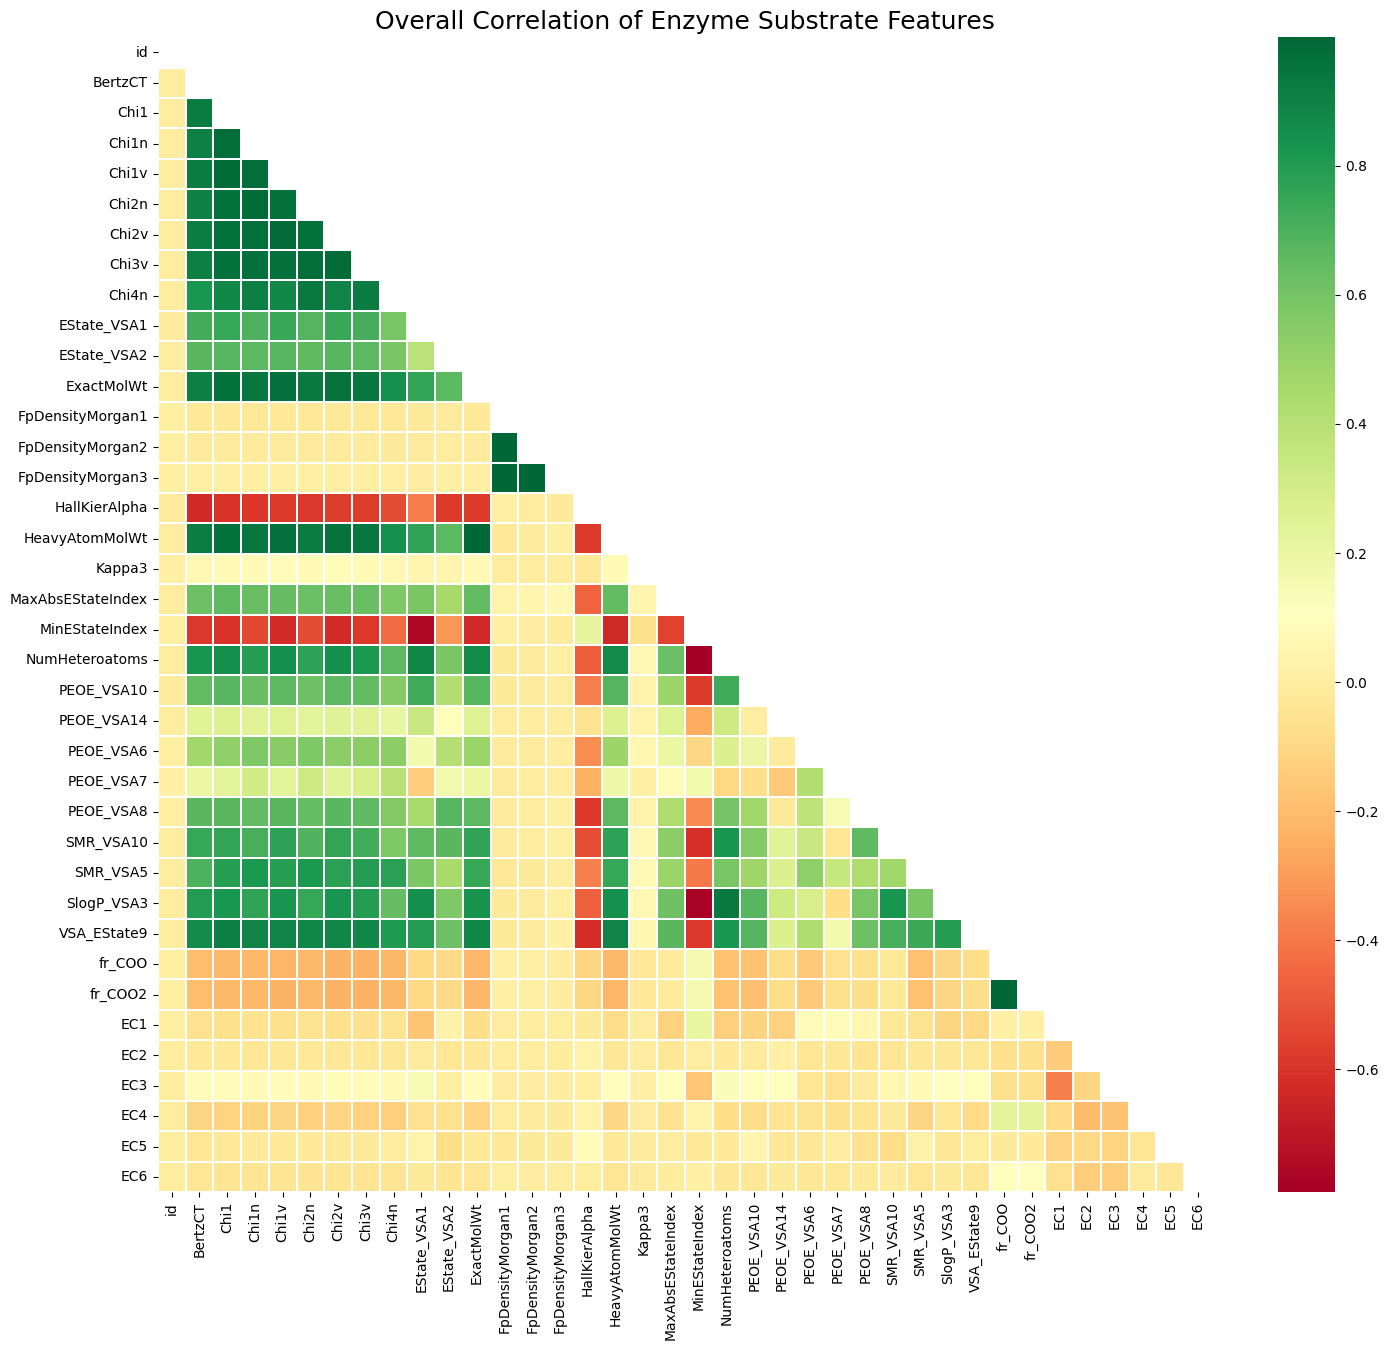

In [ ]:
show_heatmap(train, 'Enzyme Substrate')

In [ ]:
# train = train.drop('id', axis=1)

train.head()
test.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,14839,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,14840,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,14841,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,14842,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


<Axes: >

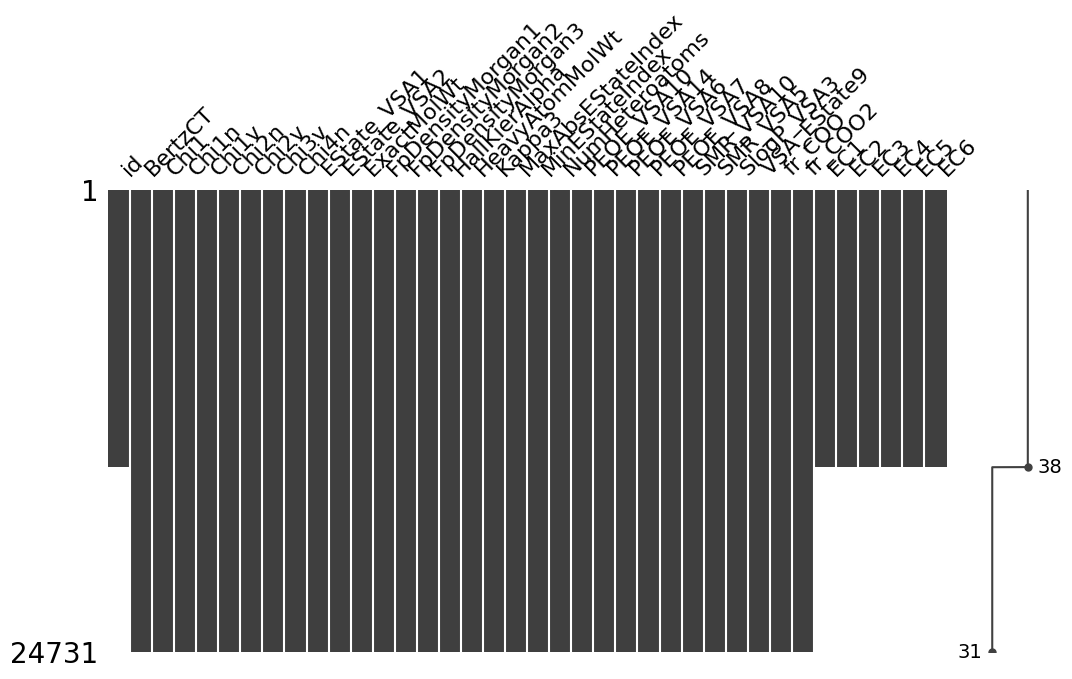

In [ ]:
## Added for handling train-test set at once

n_train = train.shape[0]
n_test = test.shape[0]

test = test.drop('id', axis=1)
train = pd.concat((train, test))


missingno.matrix(train, figsize=(12,6))

In [ ]:
# normalizing each columns' data between 0 ~ 1

scaler = MinMaxScaler()

normalized_values = scaler.fit_transform(train.values)
normalized_train = pd.DataFrame(normalized_values, columns=train.columns)
normalized_train.describe()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,...,24731.000000,24731.000000,24731.000000,24731.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.500000,0.126698,0.131183,0.116629,0.124773,0.121839,0.117406,0.127602,0.109758,0.080021,...,0.118042,0.140523,0.057352,0.057504,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,0.288704,0.133464,0.097680,0.092573,0.108636,0.103502,0.110244,0.128451,0.115378,0.086953,...,0.126812,0.075208,0.083929,0.083968,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.036918,0.067299,0.056723,0.054321,0.053610,0.045677,0.043482,0.031453,0.016412,...,0.041545,0.090875,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.071230,0.093003,0.080651,0.081157,0.081632,0.071494,0.072178,0.066278,0.047713,...,0.083090,0.120799,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.160358,0.159682,0.149219,0.157951,0.159169,0.146120,0.164896,0.157194,0.123387,...,0.129213,0.157776,0.125000,0.125000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# generate 'bertzCT_family' column to store mean of bertzCT_family columns
bertzCT_family = ['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n', 'ExactMolWt', 'HeavyAtomMolWt', 'NumHeteroatoms', 'VSA_EState9']

normalized_train['bertzCT_family'] = normalized_train[bertzCT_family].mean(axis=1)
normalized_train.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6,bertzCT_family
0,0.000000,0.079458,0.142053,0.117103,0.108826,0.118364,0.096246,0.103023,0.108830,0.000000,...,0.105052,0.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.104794
1,0.000067,0.067255,0.104370,0.088520,0.108074,0.090326,0.100282,0.082335,0.080246,0.124099,...,0.128598,0.00,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.106324
2,0.000135,0.128169,0.156882,0.169964,0.204681,0.183269,0.212843,0.217857,0.110160,0.043017,...,0.131042,0.00,0.00,1.0,1.0,0.0,0.0,1.0,0.0,0.169092
3,0.000202,0.139419,0.179053,0.141289,0.237703,0.178120,0.245451,0.296015,0.190830,0.262958,...,0.238382,0.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.224169
4,0.000270,0.027708,0.063474,0.057125,0.053088,0.051573,0.041936,0.038765,0.045273,0.049437,...,0.099425,0.25,0.25,1.0,0.0,1.0,1.0,1.0,0.0,0.054940


In [ ]:
# remove BertzCTz_family
normalized_train = normalized_train.drop(bertzCT_family, axis=1)
normalized_train.head()

,id,EState_VSA1,EState_VSA2,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,...,SlogP_VSA3,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6,bertzCT_family
0,0.000000,0.000000,0.119459,0.997282,0.997799,0.998452,0.875000,0.069425,0.762784,0.527203,...,0.041545,0.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.104794
1,0.000067,0.124099,0.000000,0.997528,0.998322,0.999058,0.892523,0.066351,0.699435,0.121441,...,0.119800,0.00,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.106324
2,0.000135,0.043017,0.066111,0.997139,0.997823,0.998506,0.811916,0.073671,0.718993,0.102313,...,0.155663,0.00,0.00,1.0,1.0,0.0,0.0,1.0,0.0,0.169092
3,0.000202,0.262958,0.000000,0.997254,0.997570,0.998312,0.751168,0.068530,0.714715,0.085251,...,0.276952,0.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.224169
4,0.000270,0.049437,0.128498,0.997675,0.998373,0.998739,0.774533,0.066802,0.630555,0.377304,...,0.083090,0.25,0.25,1.0,0.0,1.0,1.0,1.0,0.0,0.054940


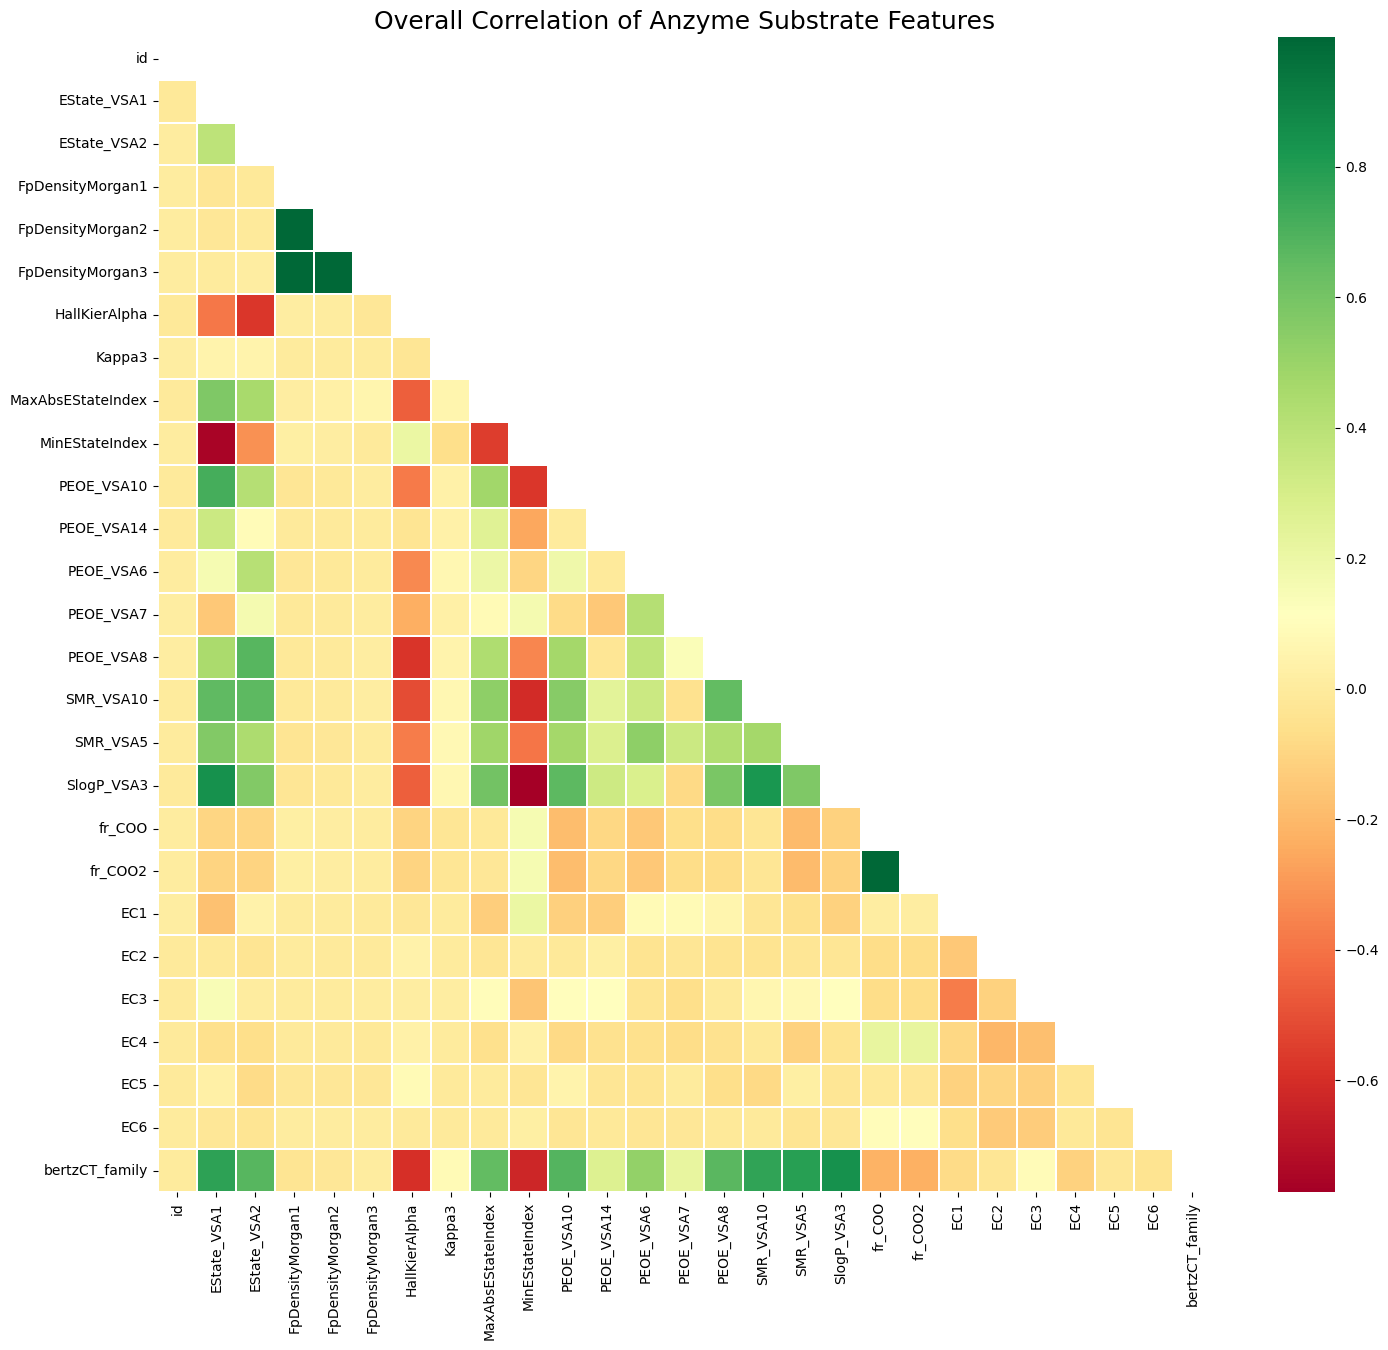

In [ ]:
show_heatmap(normalized_train, 'Anzyme Substrate')

In [ ]:
fpDensityMorgan_family = ['FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3']
normalized_train['fpDensityMorgan_family'] = normalized_train[fpDensityMorgan_family].mean(axis=1)

frCOO_family = ['fr_COO', 'fr_COO2']
normalized_train['frCOO_family'] = normalized_train[frCOO_family].mean(axis=1)
normalized_train.describe()

,id,EState_VSA1,EState_VSA2,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,...,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6,bertzCT_family,fpDensityMorgan_family,frCOO_family
count,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,...,24731.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,24731.000000,24731.000000,24731.000000
mean,0.500000,0.080021,0.104817,0.997391,0.997956,0.998319,0.761989,0.067858,0.675359,0.342011,...,0.057504,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570,0.128645,0.997889,0.057428
std,0.288704,0.086953,0.137070,0.006367,0.006370,0.006376,0.108698,0.026342,0.100106,0.167404,...,0.083968,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616,0.104530,0.006366,0.083868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002733,0.000000,0.000000
25%,0.250000,0.016412,0.000000,0.997075,0.997747,0.998058,0.707944,0.065477,0.635377,0.135887,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.059521,0.997709,0.000000
50%,0.500000,0.047713,0.064249,0.997384,0.998008,0.998444,0.774533,0.066388,0.666741,0.411314,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.087449,0.997938,0.000000
75%,0.750000,0.123387,0.128498,0.997758,0.998300,0.998656,0.836449,0.067971,0.737542,0.449440,...,0.125000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.160921,0.998207,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.806447,0.999701,1.000000


In [ ]:
normalized_train = normalized_train.drop(fpDensityMorgan_family, axis=1)
normalized_train = normalized_train.drop(frCOO_family, axis=1)
normalized_train.describe()

,id,EState_VSA1,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,...,SlogP_VSA3,EC1,EC2,EC3,EC4,EC5,EC6,bertzCT_family,fpDensityMorgan_family,frCOO_family
count,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,...,24731.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,24731.000000,24731.000000,24731.000000
mean,0.500000,0.080021,0.104817,0.761989,0.067858,0.675359,0.342011,0.090366,0.037459,0.023825,...,0.118042,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570,0.128645,0.997889,0.057428
std,0.288704,0.086953,0.137070,0.108698,0.026342,0.100106,0.167404,0.114224,0.072707,0.052203,...,0.126812,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616,0.104530,0.006366,0.083868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002733,0.000000,0.000000
25%,0.250000,0.016412,0.000000,0.707944,0.065477,0.635377,0.135887,0.000000,0.000000,0.000000,...,0.041545,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.059521,0.997709,0.000000
50%,0.500000,0.047713,0.064249,0.774533,0.066388,0.666741,0.411314,0.049516,0.012373,0.000000,...,0.083090,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.087449,0.997938,0.000000
75%,0.750000,0.123387,0.128498,0.836449,0.067971,0.737542,0.449440,0.150076,0.032695,0.032317,...,0.129213,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.160921,0.998207,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.806447,0.999701,1.000000


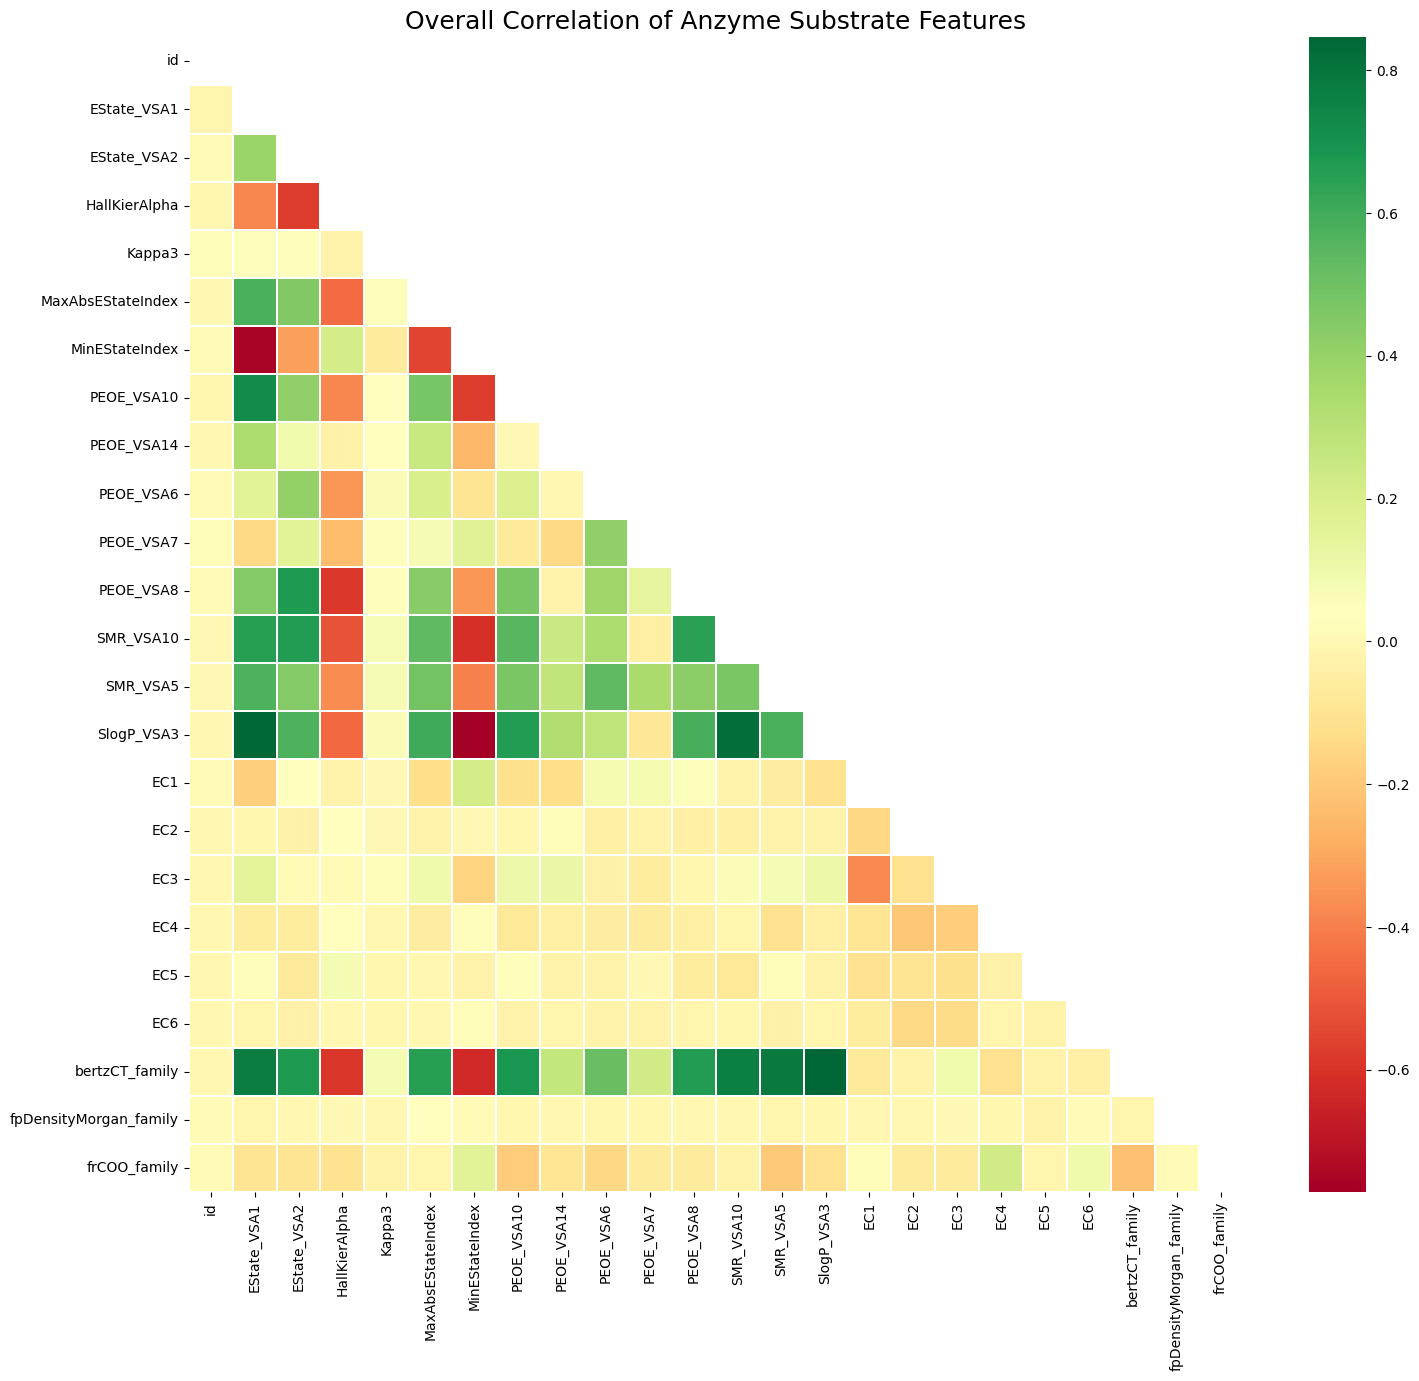

In [ ]:
show_heatmap(normalized_train, 'Anzyme Substrate')

In [ ]:
unused_ecs = ['EC3', 'EC4', 'EC5', 'EC6']
normalized_train = normalized_train.drop(unused_ecs, axis=1)

In [ ]:
normalized_train.describe()

,id,EState_VSA1,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,EC1,EC2,bertzCT_family,fpDensityMorgan_family,frCOO_family
count,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,14838.000000,14838.000000,24731.000000,24731.000000,24731.000000
mean,0.500000,0.080021,0.104817,0.761989,0.067858,0.675359,0.342011,0.090366,0.037459,0.023825,0.041560,0.067150,0.194747,0.062931,0.118042,0.667745,0.798962,0.128645,0.997889,0.057428
std,0.288704,0.086953,0.137070,0.108698,0.026342,0.100106,0.167404,0.114224,0.072707,0.052203,0.074083,0.107928,0.224843,0.068498,0.126812,0.471038,0.400790,0.104530,0.006366,0.083868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002733,0.000000,0.000000
25%,0.250000,0.016412,0.000000,0.707944,0.065477,0.635377,0.135887,0.000000,0.000000,0.000000,0.000000,0.000000,0.073930,0.013031,0.041545,0.000000,1.000000,0.059521,0.997709,0.000000
50%,0.500000,0.047713,0.064249,0.774533,0.066388,0.666741,0.411314,0.049516,0.012373,0.000000,0.000000,0.000000,0.145556,0.040492,0.083090,1.000000,1.000000,0.087449,0.997938,0.000000
75%,0.750000,0.123387,0.128498,0.836449,0.067971,0.737542,0.449440,0.150076,0.032695,0.032317,0.049165,0.068997,0.219487,0.086716,0.129213,1.000000,1.000000,0.160921,0.998207,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.806447,0.999701,1.000000


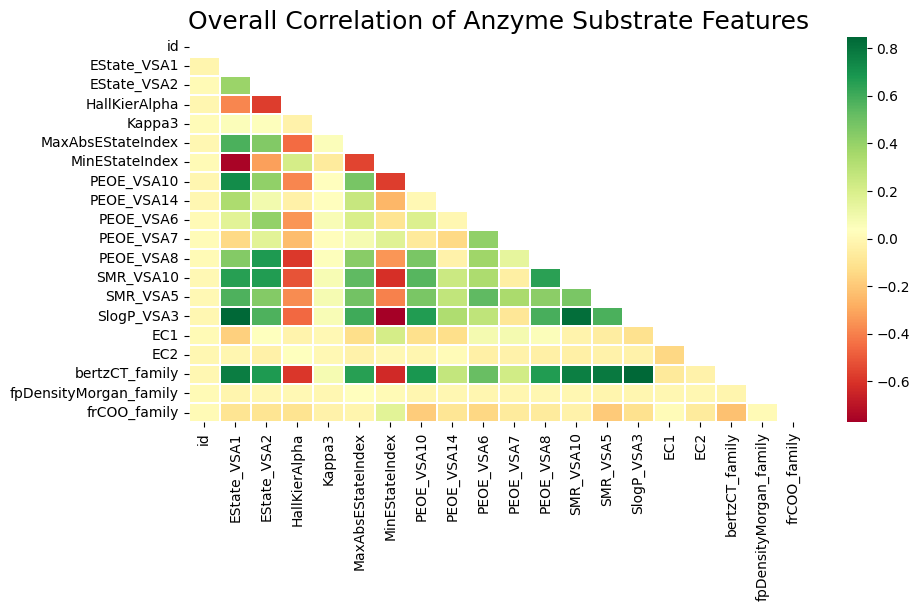

In [ ]:
show_heatmap(normalized_train, 'Anzyme Substrate', 10, 5)

In [ ]:
bertzCT_family_ext = ['bertzCT_family', 'EState_VSA1', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3']
normalized_train['bertzCT_family_ext'] = normalized_train[bertzCT_family_ext].mean(axis=1)

normalized_train = normalized_train.drop(bertzCT_family_ext, axis=1)
normalized_train.describe()

,id,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,fpDensityMorgan_family,frCOO_family,bertzCT_family_ext
count,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,14838.000000,14838.000000,24731.000000,24731.000000,24731.000000
mean,0.500000,0.104817,0.761989,0.067858,0.675359,0.342011,0.090366,0.037459,0.023825,0.041560,0.067150,0.667745,0.798962,0.997889,0.057428,0.116877
std,0.288704,0.137070,0.108698,0.026342,0.100106,0.167404,0.114224,0.072707,0.052203,0.074083,0.107928,0.471038,0.400790,0.006366,0.083868,0.108828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000547
25%,0.250000,0.000000,0.707944,0.065477,0.635377,0.135887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.997709,0.000000,0.049106
50%,0.500000,0.064249,0.774533,0.066388,0.666741,0.411314,0.049516,0.012373,0.000000,0.000000,0.000000,1.000000,1.000000,0.997938,0.000000,0.079660
75%,0.750000,0.128498,0.836449,0.067971,0.737542,0.449440,0.150076,0.032695,0.032317,0.049165,0.068997,1.000000,1.000000,0.998207,0.125000,0.129589
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999701,1.000000,0.727154


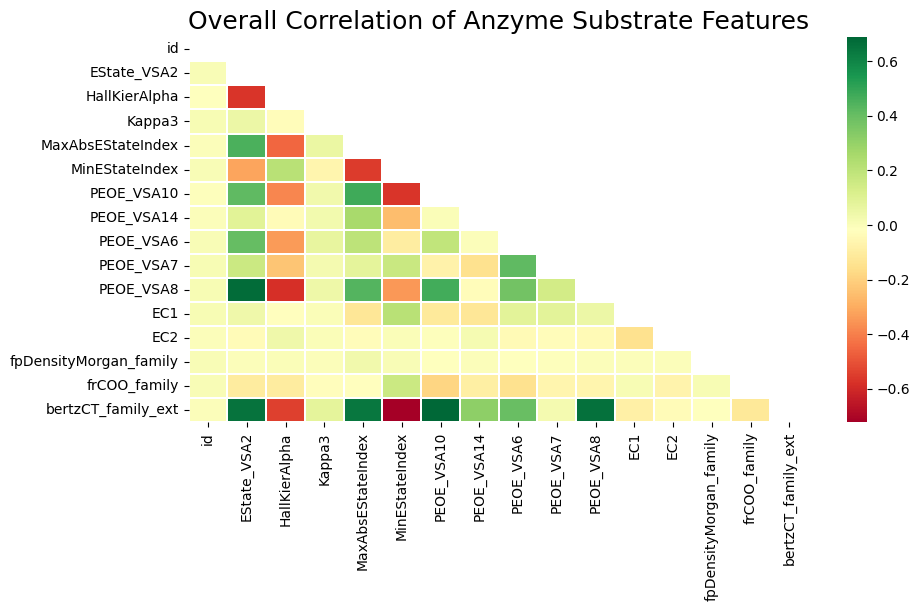

In [ ]:
show_heatmap(normalized_train, 'Anzyme Substrate', 10, 5)

In [ ]:
normalized_train.describe()

,id,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,fpDensityMorgan_family,frCOO_family,bertzCT_family_ext
count,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,14838.000000,14838.000000,24731.000000,24731.000000,24731.000000
mean,0.500000,0.104817,0.761989,0.067858,0.675359,0.342011,0.090366,0.037459,0.023825,0.041560,0.067150,0.667745,0.798962,0.997889,0.057428,0.116877
std,0.288704,0.137070,0.108698,0.026342,0.100106,0.167404,0.114224,0.072707,0.052203,0.074083,0.107928,0.471038,0.400790,0.006366,0.083868,0.108828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000547
25%,0.250000,0.000000,0.707944,0.065477,0.635377,0.135887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.997709,0.000000,0.049106
50%,0.500000,0.064249,0.774533,0.066388,0.666741,0.411314,0.049516,0.012373,0.000000,0.000000,0.000000,1.000000,1.000000,0.997938,0.000000,0.079660
75%,0.750000,0.128498,0.836449,0.067971,0.737542,0.449440,0.150076,0.032695,0.032317,0.049165,0.068997,1.000000,1.000000,0.998207,0.125000,0.129589
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999701,1.000000,0.727154


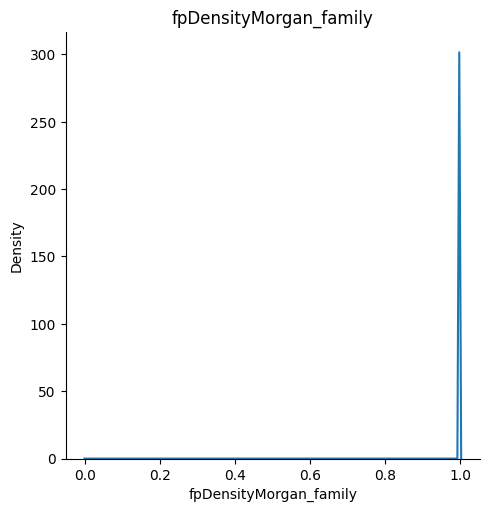

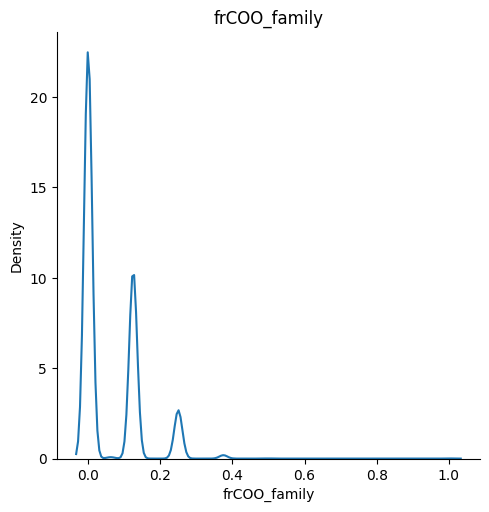

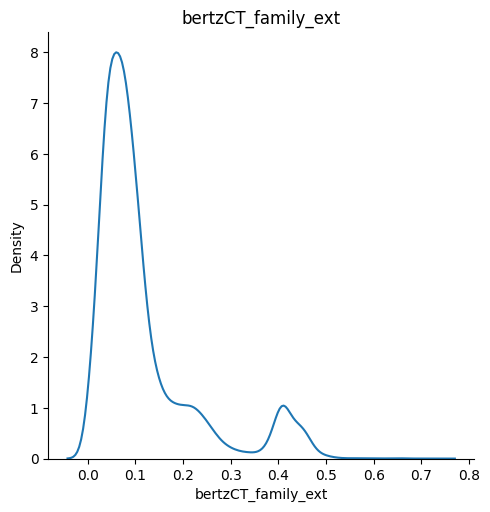

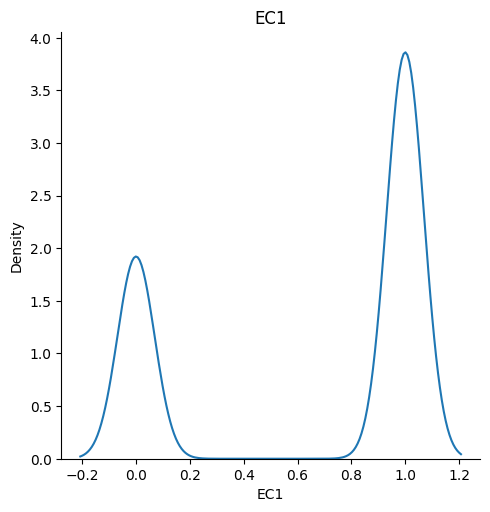

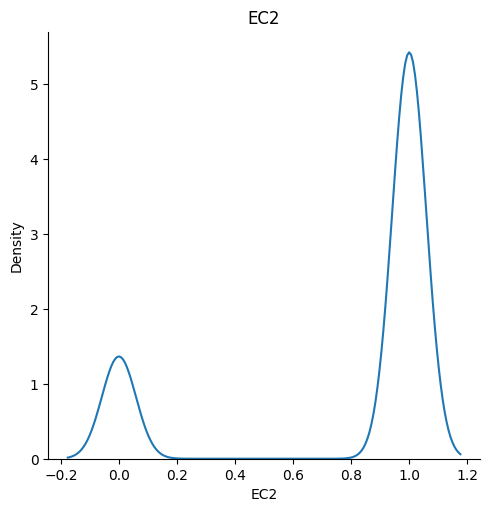

In [ ]:
import seaborn as sns

sns.displot(data = normalized_train['fpDensityMorgan_family'], kind='kde').set(title='fpDensityMorgan_family')
sns.displot(data = normalized_train['frCOO_family'], kind='kde').set(title='frCOO_family')
sns.displot(data = normalized_train['bertzCT_family_ext'], kind='kde').set(title='bertzCT_family_ext')
sns.displot(data = normalized_train['EC1'], kind='kde').set(title='EC1')
sns.displot(data = normalized_train['EC2'], kind='kde').set(title='EC2')

In [ ]:
# Drop "fpDensityMorgan_family" because it seems not useful

normalized_train = normalized_train.drop('fpDensityMorgan_family', axis=1)
normalized_train.describe()

,id,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,frCOO_family,bertzCT_family_ext
count,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,14838.000000,14838.000000,24731.000000,24731.000000
mean,0.500000,0.104817,0.761989,0.067858,0.675359,0.342011,0.090366,0.037459,0.023825,0.041560,0.067150,0.667745,0.798962,0.057428,0.116877
std,0.288704,0.137070,0.108698,0.026342,0.100106,0.167404,0.114224,0.072707,0.052203,0.074083,0.107928,0.471038,0.400790,0.083868,0.108828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000547
25%,0.250000,0.000000,0.707944,0.065477,0.635377,0.135887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.049106
50%,0.500000,0.064249,0.774533,0.066388,0.666741,0.411314,0.049516,0.012373,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.079660
75%,0.750000,0.128498,0.836449,0.067971,0.737542,0.449440,0.150076,0.032695,0.032317,0.049165,0.068997,1.000000,1.000000,0.125000,0.129589
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.727154


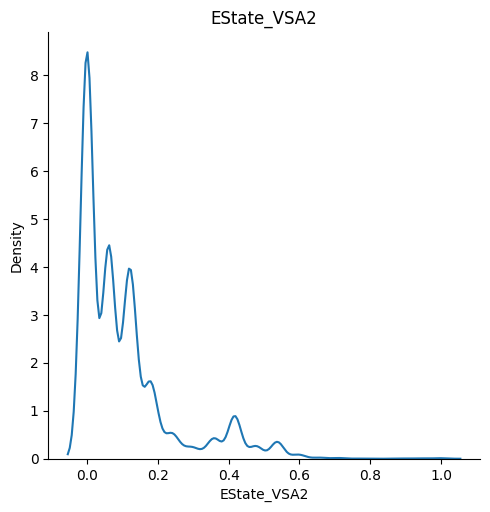

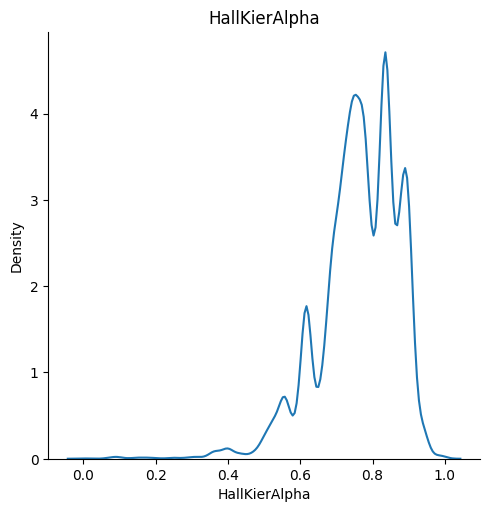

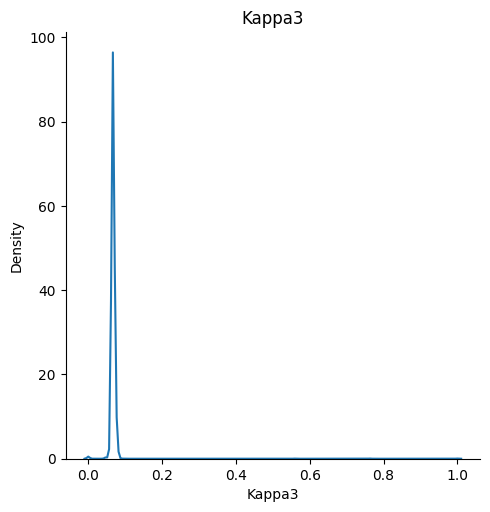

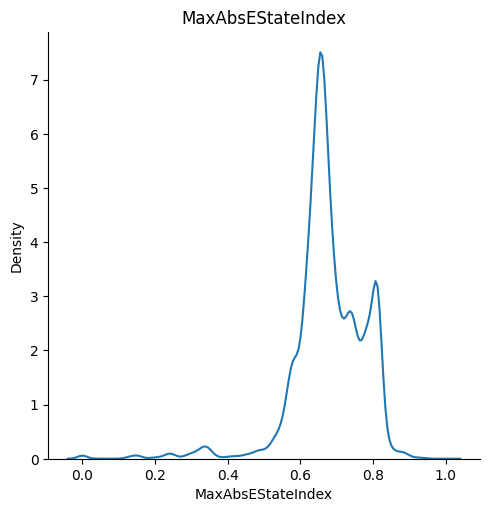

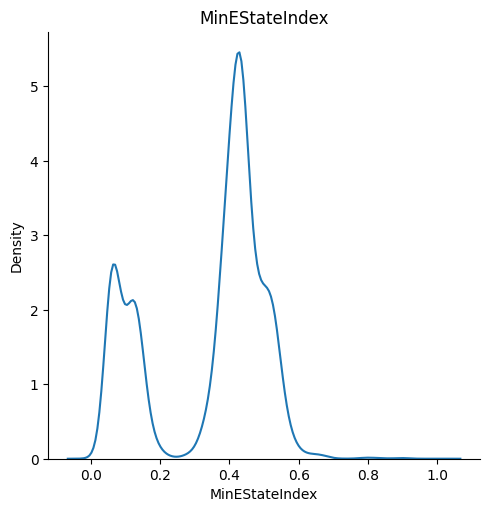

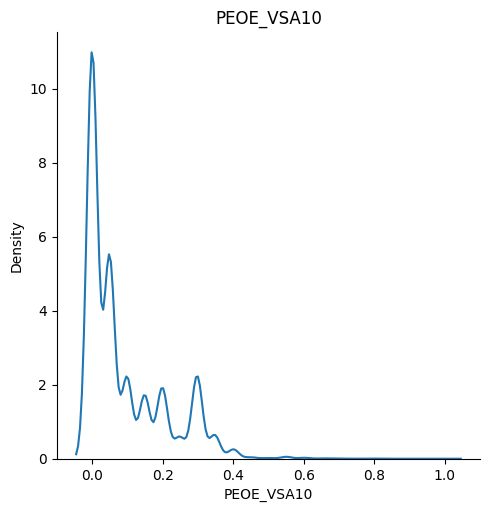

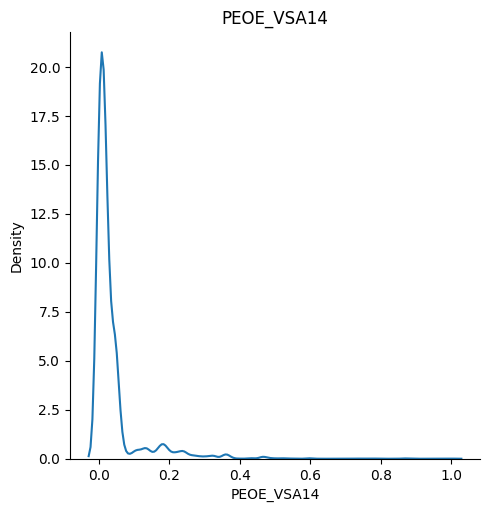

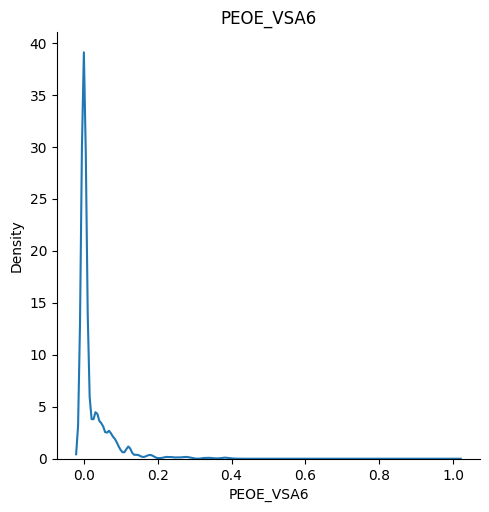

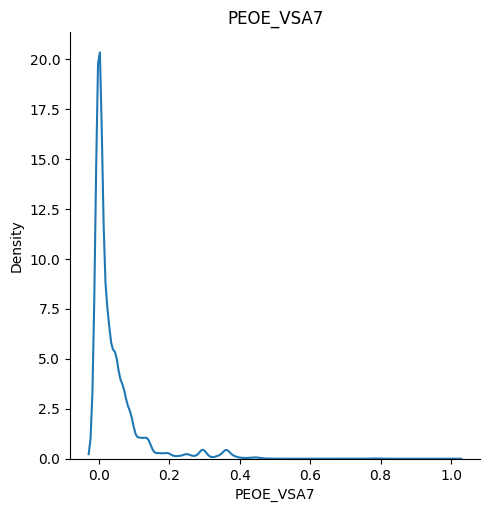

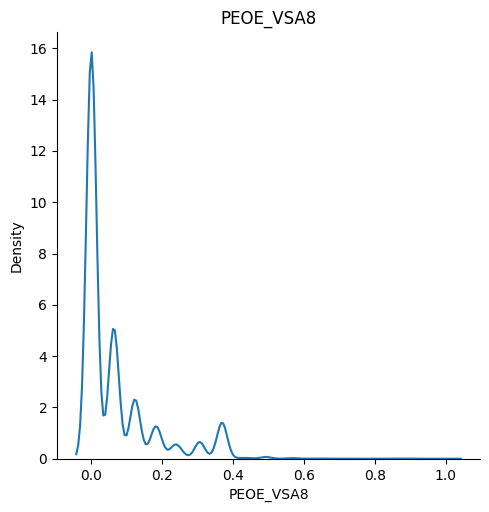

In [ ]:
sns.displot(data = normalized_train['EState_VSA2'], kind='kde').set(title='EState_VSA2')
sns.displot(data = normalized_train['HallKierAlpha'], kind='kde').set(title='HallKierAlpha')
sns.displot(data = normalized_train['Kappa3'], kind='kde').set(title='Kappa3')
sns.displot(data = normalized_train['MaxAbsEStateIndex'], kind='kde').set(title='MaxAbsEStateIndex')
sns.displot(data = normalized_train['MinEStateIndex'], kind='kde').set(title='MinEStateIndex')
sns.displot(data = normalized_train['PEOE_VSA10'], kind='kde').set(title='PEOE_VSA10')
sns.displot(data = normalized_train['PEOE_VSA14'], kind='kde').set(title='PEOE_VSA14')
sns.displot(data = normalized_train['PEOE_VSA6'], kind='kde').set(title='PEOE_VSA6')
sns.displot(data = normalized_train['PEOE_VSA7'], kind='kde').set(title='PEOE_VSA7') 
sns.displot(data = normalized_train['PEOE_VSA8'], kind='kde').set(title='PEOE_VSA8')

In [ ]:
normalized_train.head()

,id,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,frCOO_family,bertzCT_family_ext
0,0.000000,0.119459,0.875000,0.069425,0.762784,0.527203,0.000000,0.189739,0.000000,0.000000,0.000000,1.0,1.0,0.00,0.073220
1,0.000067,0.000000,0.892523,0.066351,0.699435,0.121441,0.200102,0.016215,0.000000,0.000000,0.000000,0.0,1.0,0.00,0.101885
2,0.000135,0.066111,0.811916,0.073671,0.718993,0.102313,0.000000,0.032430,0.000000,0.196660,0.000000,1.0,1.0,0.00,0.141997
3,0.000202,0.000000,0.751168,0.068530,0.714715,0.085251,0.350178,0.044224,0.000000,0.000000,0.063985,1.0,1.0,0.00,0.216779
4,0.000270,0.128498,0.774533,0.066802,0.630555,0.377304,0.049516,0.024747,0.018442,0.071425,0.000000,1.0,0.0,0.25,0.074730


In [ ]:
# Drop 'Kappa3' because it seems not useful
normalized_train = normalized_train.drop('Kappa3', axis=1)
normalized_train.describe() 

,id,EState_VSA2,HallKierAlpha,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,frCOO_family,bertzCT_family_ext
count,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,14838.000000,14838.000000,24731.000000,24731.000000
mean,0.500000,0.104817,0.761989,0.675359,0.342011,0.090366,0.037459,0.023825,0.041560,0.067150,0.667745,0.798962,0.057428,0.116877
std,0.288704,0.137070,0.108698,0.100106,0.167404,0.114224,0.072707,0.052203,0.074083,0.107928,0.471038,0.400790,0.083868,0.108828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000547
25%,0.250000,0.000000,0.707944,0.635377,0.135887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.049106
50%,0.500000,0.064249,0.774533,0.666741,0.411314,0.049516,0.012373,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.079660
75%,0.750000,0.128498,0.836449,0.737542,0.449440,0.150076,0.032695,0.032317,0.049165,0.068997,1.000000,1.000000,0.125000,0.129589
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.727154


In [ ]:
column_names = ['EState_VSA2', 'HallKierAlpha', 'MaxAbsEStateIndex', 'MinEStateIndex', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'frCOO_family', 'bertzCT_family_ext']
group_names = ['EState_VSA2_group', 'HallKierAlpha_group', 'MaxAbsEStateIndex_group', 'MinEStateIndex_group', 'PEOE_VSA10_group', 'PEOE_VSA14_group', 'PEOE_VSA6_group', 'PEOE_VSA7_group', 'PEOE_VSA8_group', 'frCOO_family_group', 'bertzCT_family_ext_group']

column_group_names = dict(zip(column_names, group_names))

for column_name, group_name in column_group_names.items():

    normalized_train[group_name] = 0

    normalized_train.loc[normalized_train[column_name] < 0.1, group_name] = 0
    normalized_train.loc[(normalized_train[column_name] >= 0.1) & (normalized_train[column_name] < 0.2), group_name] = 1
    normalized_train.loc[(normalized_train[column_name] >= 0.2) & (normalized_train[column_name] < 0.3), group_name] = 2
    normalized_train.loc[(normalized_train[column_name] >= 0.3) & (normalized_train[column_name] < 0.4), group_name] = 3
    normalized_train.loc[(normalized_train[column_name] >= 0.4) & (normalized_train[column_name] < 0.5), group_name] = 4
    normalized_train.loc[(normalized_train[column_name] >= 0.5) & (normalized_train[column_name] < 0.6), group_name] = 5
    normalized_train.loc[(normalized_train[column_name] >= 0.6) & (normalized_train[column_name] < 0.7), group_name] = 6
    normalized_train.loc[(normalized_train[column_name] >= 0.7) & (normalized_train[column_name] < 0.8), group_name] = 7
    normalized_train.loc[(normalized_train[column_name] >= 0.8) & (normalized_train[column_name] < 0.9), group_name] = 8
    normalized_train.loc[(normalized_train[column_name] >= 0.9) & (normalized_train[column_name] < 1.0), group_name] = 9


normalized_train.describe()

,id,EState_VSA2,HallKierAlpha,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,...,HallKierAlpha_group,MaxAbsEStateIndex_group,MinEStateIndex_group,PEOE_VSA10_group,PEOE_VSA14_group,PEOE_VSA6_group,PEOE_VSA7_group,PEOE_VSA8_group,frCOO_family_group,bertzCT_family_ext_group
count,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,...,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000
mean,0.500000,0.104817,0.761989,0.675359,0.342011,0.090366,0.037459,0.023825,0.041560,0.067150,...,7.125187,6.255914,2.959727,0.614128,0.168857,0.089442,0.178683,0.440176,0.456836,0.678298
std,0.288704,0.137070,0.108698,0.100106,0.167404,0.114224,0.072707,0.052203,0.074083,0.107928,...,1.087822,1.047233,1.719208,1.000498,0.624440,0.383450,0.597589,0.923701,0.664162,1.132802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.707944,0.635377,0.135887,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.064249,0.774533,0.666741,0.411314,0.049516,0.012373,0.000000,0.000000,0.000000,...,7.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.128498,0.836449,0.737542,0.449440,0.150076,0.032695,0.032317,0.049165,0.068997,...,8.000000,7.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,8.000000,8.000000,9.000000,8.000000,7.000000,9.000000,8.000000,7.000000


In [ ]:
normalized_train.head()

,id,EState_VSA2,HallKierAlpha,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,...,HallKierAlpha_group,MaxAbsEStateIndex_group,MinEStateIndex_group,PEOE_VSA10_group,PEOE_VSA14_group,PEOE_VSA6_group,PEOE_VSA7_group,PEOE_VSA8_group,frCOO_family_group,bertzCT_family_ext_group
0,0.000000,0.119459,0.875000,0.762784,0.527203,0.000000,0.189739,0.000000,0.000000,0.000000,...,8,7,5,0,1,0,0,0,0,0
1,0.000067,0.000000,0.892523,0.699435,0.121441,0.200102,0.016215,0.000000,0.000000,0.000000,...,8,6,1,2,0,0,0,0,0,1
2,0.000135,0.066111,0.811916,0.718993,0.102313,0.000000,0.032430,0.000000,0.196660,0.000000,...,8,7,1,0,0,0,1,0,0,1
3,0.000202,0.000000,0.751168,0.714715,0.085251,0.350178,0.044224,0.000000,0.000000,0.063985,...,7,7,0,3,0,0,0,0,0,2
4,0.000270,0.128498,0.774533,0.630555,0.377304,0.049516,0.024747,0.018442,0.071425,0.000000,...,7,6,3,0,0,0,0,0,2,0


In [ ]:
normalized_train = normalized_train.drop(column_names, axis=1)
normalized_train.head()

,id,EC1,EC2,EState_VSA2_group,HallKierAlpha_group,MaxAbsEStateIndex_group,MinEStateIndex_group,PEOE_VSA10_group,PEOE_VSA14_group,PEOE_VSA6_group,PEOE_VSA7_group,PEOE_VSA8_group,frCOO_family_group,bertzCT_family_ext_group
0,0.000000,1.0,1.0,1,8,7,5,0,1,0,0,0,0,0
1,0.000067,0.0,1.0,0,8,6,1,2,0,0,0,0,0,1
2,0.000135,1.0,1.0,0,8,7,1,0,0,0,1,0,0,1
3,0.000202,1.0,1.0,0,7,7,0,3,0,0,0,0,0,2
4,0.000270,1.0,0.0,1,7,6,3,0,0,0,0,0,2,0


In [ ]:
for idx, group_name in enumerate(group_names):
    normalized_train[f'F{idx + 1}'] = normalized_train[group_name]

normalized_train.head()

,id,EC1,EC2,EState_VSA2_group,HallKierAlpha_group,MaxAbsEStateIndex_group,MinEStateIndex_group,PEOE_VSA10_group,PEOE_VSA14_group,PEOE_VSA6_group,...,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,0.000000,1.0,1.0,1,8,7,5,0,1,0,...,8,7,5,0,1,0,0,0,0,0
1,0.000067,0.0,1.0,0,8,6,1,2,0,0,...,8,6,1,2,0,0,0,0,0,1
2,0.000135,1.0,1.0,0,8,7,1,0,0,0,...,8,7,1,0,0,0,1,0,0,1
3,0.000202,1.0,1.0,0,7,7,0,3,0,0,...,7,7,0,3,0,0,0,0,0,2
4,0.000270,1.0,0.0,1,7,6,3,0,0,0,...,7,6,3,0,0,0,0,0,2,0


In [ ]:
normalized_train = normalized_train.drop(group_names, axis=1)
normalized_train.describe()

,id,EC1,EC2,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
count,14838.000000,14838.000000,14838.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000,24731.000000
mean,0.500000,0.667745,0.798962,0.757228,7.125187,6.255914,2.959727,0.614128,0.168857,0.089442,0.178683,0.440176,0.456836,0.678298
std,0.288704,0.471038,0.400790,1.267983,1.087822,1.047233,1.719208,1.000498,0.624440,0.383450,0.597589,0.923701,0.664162,1.132802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,1.000000,0.000000,7.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,1.000000,0.000000,7.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1.000000,1.000000,1.000000,8.000000,7.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,9.000000,9.000000,9.000000,8.000000,8.000000,9.000000,8.000000,7.000000,9.000000,8.000000,7.000000


In [ ]:
normalized_train.head()

,id,EC1,EC2,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,0.000000,1.0,1.0,1,8,7,5,0,1,0,0,0,0,0
1,0.000067,0.0,1.0,0,8,6,1,2,0,0,0,0,0,1
2,0.000135,1.0,1.0,0,8,7,1,0,0,0,1,0,0,1
3,0.000202,1.0,1.0,0,7,7,0,3,0,0,0,0,0,2
4,0.000270,1.0,0.0,1,7,6,3,0,0,0,0,0,2,0


In [ ]:
feature_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11']

dfl = pd.DataFrame()
dfl[feature_columns] = normalized_train[feature_columns]
dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,1,8,7,5,0,1,0,0,0,0,0
1,0,8,6,1,2,0,0,0,0,0,1
2,0,8,7,1,0,0,0,1,0,0,1
3,0,7,7,0,3,0,0,0,0,0,2
4,1,7,6,3,0,0,0,0,0,2,0


In [ ]:
#전처리 및 머신러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

In [ ]:
 # 리스트 준비
# models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
# model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
models = [gbc, ada,]         
model_names = ['Gradient Boosting', 'AdaBoost']
scores = {}

In [ ]:
X_train = dfl[:n_train]
X_test = dfl[n_train:]
y_train_ec1 = normalized_train['EC1'][:n_train]
y_train_ec2 = normalized_train['EC2'][:n_train]

print(X_train.head())
print(y_train_ec1.head())
print(y_train_ec2.head())

   F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  F11
0   1   8   7   5   0   1   0   0   0    0    0
1   0   8   6   1   2   0   0   0   0    0    1
2   0   8   7   1   0   0   0   1   0    0    1
3   0   7   7   0   3   0   0   0   0    0    2
4   1   7   6   3   0   0   0   0   0    2    0
0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: EC1, dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: EC2, dtype: float64


In [ ]:
# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
import time

for ind, mod in enumerate(models):
    print(f"{model_names[ind]} training started...")
    start_time = time.time()
    
    mod.fit(X_train, y_train_ec1)
    acc = cross_val_score(mod, X_train, y_train_ec1, scoring = 'accuracy', cv = 10)
    scores[model_names[ind]] = acc
    
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"{model_names[ind]} training finished!! (Elapsed Time: {elapsed_time})")
    

Gradient Boosting training started...
Gradient Boosting training finished!! (Elapsed Time: 5.712325811386108)
AdaBoost training started...
AdaBoost training finished!! (Elapsed Time: 2.514207124710083)


In [ ]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Gradient Boosting,0.698113,0.723046,0.698787,0.687332,0.695418,0.710916,0.699461,0.708221,0.693864,0.690492,0.700565
AdaBoost,0.696765,0.718329,0.700809,0.693396,0.695418,0.700809,0.701482,0.708221,0.681726,0.683075,0.698003


Text(0.5, 0, 'Accuracy Score (%)')

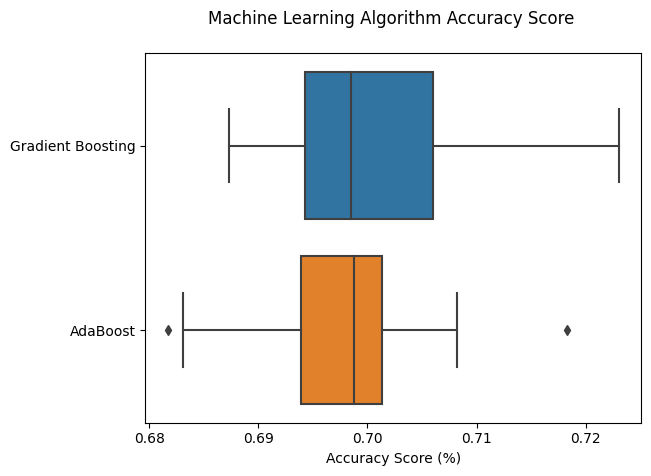

In [ ]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')

In [ ]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style='whitegrid')
    ax = data.tail(n).plot(kind='barh')

    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

In [ ]:
test.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,344.632371,7.283603,4.473966,5.834958,3.412257,4.651530,2.096558,1.116433,49.458581,0.000000,...,13.512441,0.000000,0.000000,0.000000,26.809272,24.539800,4.794537,47.304082,1,1
1,1432.410201,10.663869,7.079026,8.065215,5.297097,5.297097,3.924155,2.569694,0.000000,29.783175,...,0.000000,34.947374,98.323987,9.606882,0.000000,53.378235,0.000000,43.166667,0,0
2,83.352608,3.931852,1.774215,1.774215,1.073446,1.073446,0.467830,0.170838,5.969305,6.420822,...,5.969305,0.000000,0.000000,6.420822,11.752550,13.344559,9.589074,24.666667,1,1
3,150.255712,5.912790,3.548812,3.548812,2.595128,2.595128,1.642813,0.694113,0.000000,0.000000,...,59.935299,0.000000,0.000000,0.000000,17.744066,32.290168,4.794537,26.778866,0,0
4,1817.276351,24.910940,15.540529,20.047314,12.535886,17.730988,11.979618,4.431173,84.554972,47.360206,...,23.468091,25.609359,0.000000,37.099000,69.141353,38.704130,50.697492,102.583333,0,0


In [ ]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Gradient Boosting', gbc),
    ('AdaBoost', ada)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train_ec1, cv=10)
grid_hard.fit(X_train, y_train_ec1)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 69.94


In [ ]:
predictions_ec1 = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(enzymeId), pd.DataFrame(predictions_ec1)], axis='columns')
submission.columns = ['id', 'EC1']

In [ ]:
predictions_ec1

array([0., 1., 1., ..., 1., 1., 0.])

In [ ]:
submission

,id,EC1
0,14838,0.0
1,14839,1.0
2,14840,1.0
3,14841,1.0
4,14842,1.0
...,...,...
9888,24726,1.0
9889,24727,1.0
9890,24728,1.0
9891,24729,1.0


In [ ]:
 # 리스트 준비
# models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
# model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']

models = [log, svc, ada]         
model_names = ['Logistic Regression', 'SVC', 'AdaBoost']
scores = {}

In [ ]:
# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
import time

for ind, mod in enumerate(models):
    print(f"{model_names[ind]} training started...")
    start_time = time.time()
    
    mod.fit(X_train, y_train_ec2)
    acc = cross_val_score(mod, X_train, y_train_ec2, scoring = 'accuracy', cv = 10)
    scores[model_names[ind]] = acc
    
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"{model_names[ind]} training finished!! (Elapsed Time: {elapsed_time})")
    

Random Forest training started...
Random Forest training finished!! (Elapsed Time: 7.017343997955322)
K Nearest Neighbour training started...
K Nearest Neighbour training finished!! (Elapsed Time: 0.9856162071228027)
Logistic Regression training started...
Logistic Regression training finished!! (Elapsed Time: 0.5197911262512207)
XGBoost training started...
XGBoost training finished!! (Elapsed Time: 9.589669942855835)
Gradient Boosting training started...
Gradient Boosting training finished!! (Elapsed Time: 5.527858734130859)
SVC training started...
SVC training finished!! (Elapsed Time: 241.8036961555481)
Extra Trees training started...
Extra Trees training finished!! (Elapsed Time: 6.614107847213745)
AdaBoost training started...
AdaBoost training finished!! (Elapsed Time: 2.5123860836029053)
Gaussian Naive Bayes training started...
Gaussian Naive Bayes training finished!! (Elapsed Time: 0.06574678421020508)
Gaussian Process training started...
Gaussian Process training finished!! (El

In [ ]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
SVC,0.799191,0.799191,0.799191,0.799191,0.799191,0.798518,0.798518,0.798518,0.799056,0.799056,0.798962
Logistic Regression,0.798518,0.799191,0.798518,0.799191,0.799191,0.797844,0.798518,0.799191,0.799056,0.799056,0.798827
AdaBoost,0.799191,0.799191,0.798518,0.799191,0.799865,0.797844,0.797170,0.797844,0.799056,0.799730,0.798760
Gradient Boosting,0.798518,0.800539,0.797844,0.795148,0.800539,0.796496,0.797844,0.799191,0.797707,0.799056,0.798288
Gaussian Process,0.797170,0.797844,0.796496,0.795822,0.801213,0.792453,0.797170,0.794474,0.795010,0.795684,0.796334
XGBoost,0.792453,0.797844,0.793127,0.793801,0.798518,0.787736,0.795148,0.791779,0.793661,0.793661,0.793773
Random Forest,0.782345,0.777628,0.775606,0.775606,0.780997,0.772911,0.776280,0.775606,0.780175,0.778827,0.777598
Extra Trees,0.778302,0.766846,0.766846,0.768868,0.766846,0.761456,0.766173,0.764151,0.770735,0.772758,0.768298
K Nearest Neighbour,0.758760,0.774933,0.763477,0.778302,0.768194,0.742588,0.775606,0.768194,0.735671,0.782873,0.764860
Bagging Classifier,0.774259,0.766846,0.755391,0.753369,0.776280,0.757412,0.756065,0.757412,0.773432,0.766689,0.763716


Text(0.5, 0, 'Accuracy Score (%)')

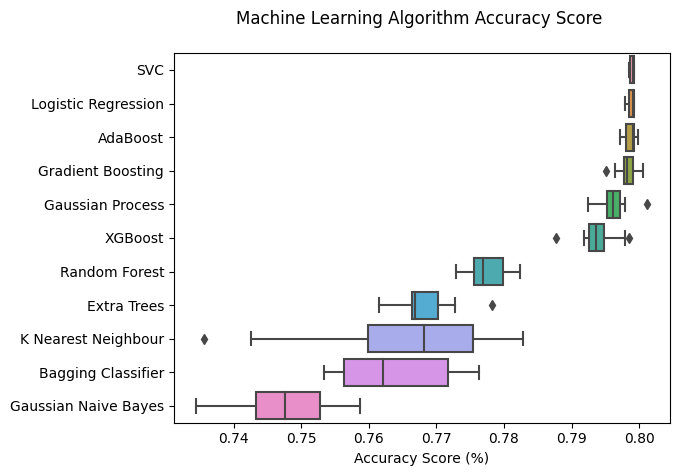

In [ ]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')

In [ ]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = 
    [('SVC', svc),
    ('Logistic Regression', log),
    ('AdaBoost', ada)], 
    voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train_ec2, cv=10)
grid_hard.fit(X_train, y_train_ec2)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 79.90


In [ ]:
predictions_ec2 = grid_hard.predict(X_test)

submission_ec2 = pd.concat([pd.DataFrame(submission), pd.DataFrame(predictions_ec2)], axis='columns')
submission_ec2.columns = ['id', 'EC1', 'EC2']

In [ ]:
submission_ec2

,id,EC1,EC2
0,14838,0.0,1.0
1,14839,1.0,1.0
2,14840,1.0,1.0
3,14841,1.0,1.0
4,14842,1.0,1.0
...,...,...,...
9888,24726,1.0,1.0
9889,24727,1.0,1.0
9890,24728,1.0,1.0
9891,24729,1.0,1.0


In [ ]:
submission_data = submission_ec2

In [ ]:
submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      9893 non-null   int64  
 1   EC1     9893 non-null   float64
 2   EC2     9893 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 232.0 KB


In [ ]:
print(submission_data.head())
print(submission_data.describe())

      id  EC1  EC2
0  14838  0.0  1.0
1  14839  1.0  1.0
2  14840  1.0  1.0
3  14841  1.0  1.0
4  14842  1.0  1.0
                id          EC1     EC2
count   9893.00000  9893.000000  9893.0
mean   19784.00000     0.788032     1.0
std     2856.00744     0.408723     0.0
min    14838.00000     0.000000     1.0
25%    17311.00000     1.000000     1.0
50%    19784.00000     1.000000     1.0
75%    22257.00000     1.000000     1.0
max    24730.00000     1.000000     1.0


In [ ]:
submission_data.to_csv('submission.csv', header = True, index = False)